In [1]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.cm import get_cmap
import numpy as np

data = xr.open_dataset("MED-MFC_006_017_mask_bathy.nc")
data
data2 = xr.open_dataset(r'med-cmcc-cur-an-fc-h_1637664022632.nc')
data3 = xr.open_dataset(r'med-hcmr-wav-an-fc-h_1637504789598.nc')
#data = Dataset("MED-MFC_006_017_mask_bathy.nc")
#print(data.variables.keys())
data2

<xarray.Dataset>
Dimensions:  (depth: 1, time: 24, lat: 380, lon: 1287)
Coordinates:
  * depth    (depth) float32 1.018
  * lon      (lon) float32 -17.29 -17.25 -17.21 -17.17 ... 36.21 36.25 36.29
  * time     (time) datetime64[ns] 2021-11-23T00:30:00 ... 2021-11-23T23:30:00
  * lat      (lat) float32 30.19 30.23 30.27 30.31 ... 45.85 45.9 45.94 45.98
Data variables:
    vo       (time, depth, lat, lon) float32 ...
    uo       (time, depth, lat, lon) float32 ...
Attributes:
    title:                           Horizontal Velocity (3D) - Hourly Mean
    FROM_ORIGINAL_FILE__field_type:  hourly_mean_centered_at_time_field
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    comment:                         Please check in CMEMS catalogue the INFO...
    Conventions:                     CF-1.0
    bulletin_date:                   20211122
    bulletin_type:                   forecast
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [283]:
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
mask = data.variables['mask'][:,:,:]
dep = data.variables['deptho'][:,:]
#Cspacex = lons.values[mask.values==1] 
#lons.values[mask[0].values==1]
#lons.values[np.array(mask[0])
#np.array(lons.values[np.array(mask)==1])
lats2 = data2.variables['lat'][:]
lons2 = data2.variables['lon'][:]
time2 = data2.variables['time'][:]
u0 = data2.variables['uo'][:,0,:,:] # I care of sea current at surface, depth=0
v0 = data2.variables['vo'][:,0,:,:]
speed = np.hypot(u0, v0)

lats3 = data3.variables['latitude'][:]
lons3 = data3.variables['longitude'][:]
time3 = data3.variables['time'][:]
u0_wave = data3.variables['VSDX'][:,:,:]
v0_wave = data3.variables['VSDY'][:,:,:]
speed_w = np.hypot(u0_wave, v0_wave)

<ipython-input-34-e4786755cc60>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, dep, cmap='jet')


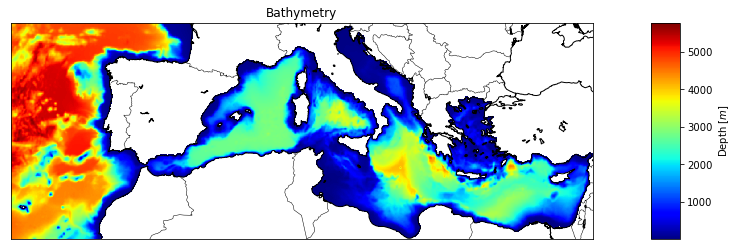

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mp = Basemap(projection = 'merc', 
             llcrnrlon=-18.125,    # lons.values[0]
             llcrnrlat=30.1875,    # lats.values[0]
             urcrnrlon=36.291668,  # lons.values[1306]
             urcrnrlat=45.979168,  # lats.values[379]
             resolution='i')

lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)

c_scheme = mp.pcolor(x, y, dep, cmap='jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
cbar = mp.colorbar(c_scheme, location='right', pad='10%')
cbar.set_label('Depth $[m]$')
plt.title('Bathymetry')
plt.show()

In [4]:
# data = xr.open_dataset("MED-MFC_006_017_coordinates.nc") 
# lats = data.variables['latitude'][:]
# lons = data.variables['longitude'][:]
# e1t = data.variables['e1t'][:,:]  # cell dimension along x
# e2t = data.variables['e2t'][:,:]  # cell dimension along y


<ipython-input-4-3e933650d729>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(x, y, mask[0], cmap=cmap)


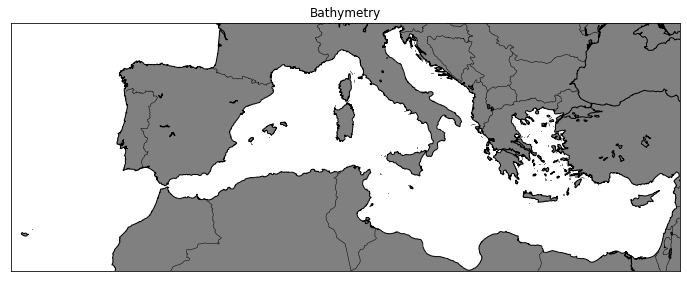

In [4]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["grey", "white"])
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

#mp.scatter(6.0508545e+06, 0, linewidth=10, marker='o')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.pcolor(x, y, mask[0], cmap=cmap)
plt.title('Bathymetry')
plt.show()

In [38]:
print(np.array(data.deptho))
data.deptho
print(dep)

[[4534.935 4533.33  4530.788 ...      nan      nan      nan]
 [4539.778 4538.908 4537.231 ...      nan      nan      nan]
 [4548.107 4547.86  4546.743 ...      nan      nan      nan]
 ...
 [4063.29  4075.142 4093.733 ...      nan      nan      nan]
 [4026.975 4038.651 4059.418 ...      nan      nan      nan]
 [4010.623 4022.336 4044.266 ...      nan      nan      nan]]
<xarray.Variable (latitude: 380, longitude: 1307)>
[496660 values with dtype=float32]
Attributes:
    long_name:      Bathymetry
    standard_name:  sea_floor_depth_below_geoid
    units:          m


In [5]:
cost = 100 * (np.array(data.deptho) > 3000) + 50 * ((np.array(data.deptho) <= 3000)&(np.array(data.deptho) > 1000))

<ipython-input-6-32bc75afe1e7>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, mask[0], cmap=cmap)


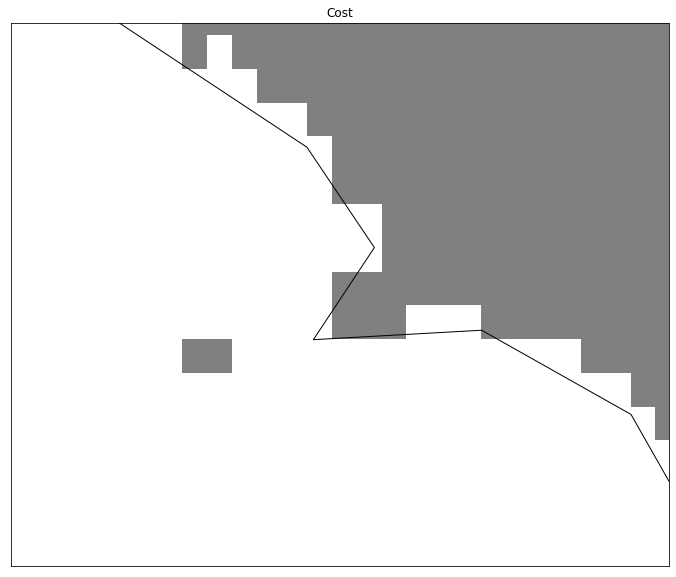

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mp = Basemap(projection = 'merc', 
             llcrnrlon=10.58675,  # 4.125, 10,  # -5.42,
             llcrnrlat=42.11383,  # 33.1875, 42
             urcrnrlon=11.68915,  # 20.291667938, 12
             urcrnrlat=42.78513,  # 45.97916,  42.7488
             resolution='l')

lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)

c_scheme = mp.pcolor(x, y, mask[0], cmap=cmap)
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
#cbar = mp.colorbar(c_scheme, location='right', pad='10%')
#cbar.set_label('Depth $[m]$')
plt.title('Cost')
plt.show()

In [50]:
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='f')

<ipython-input-8-f25ec8bb5722>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(xs_, ys_, depth_slice, cmap='jet')


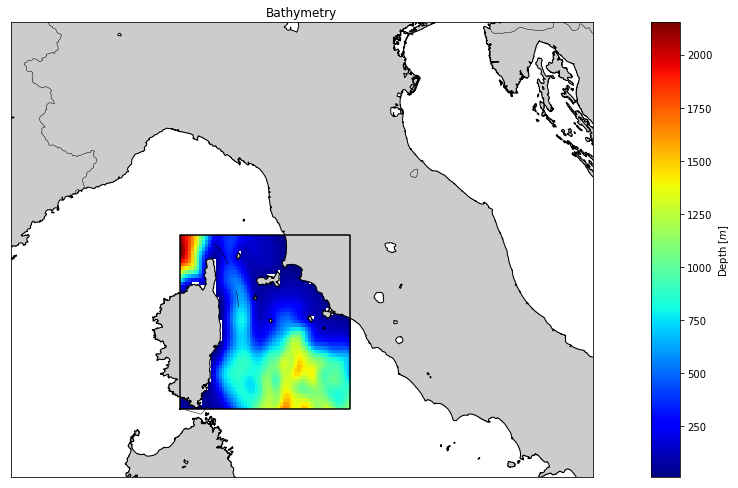

In [8]:
x_min, y_min = mp(8.958334, 41.354168)    # lons.values[650], lats.values[268] 
x_max, y_max = mp(11.500001, 43.270832)   # lons.values[711], lats.values[314]
xspace = lons.values[650:712]
yspace = lats.values[268:315]
xs, ys = np.meshgrid(xspace, yspace)
xs_, ys_ = mp(xs, ys)
depth_slice = dep[268:315, 650:712]
speed_slice = speed[0][268:315, 650:712]
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

c_scheme = mp.pcolor(xs_, ys_, depth_slice, cmap='jet')
mp.fillcontinents()
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
cbar = mp.colorbar(c_scheme, location='right', pad='10%')
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
cbar.set_label('Depth $[m]$')
plt.title('Bathymetry')
plt.show()

In [81]:
speed_u = u0[0][268:315, 630:692]
speed_v = v0[0][268:315, 630:692]

<ipython-input-150-78d3a357986e>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mp.quiver(xs_[points], ys_[points], u1[points], v1[points], width=0.0005, color='b')


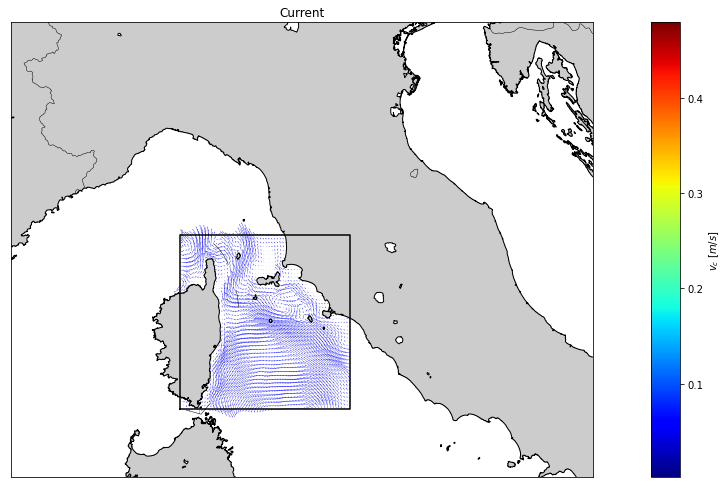

In [150]:
x_min, y_min = mp(8.958334, 41.354168)    # lons.values[650], lats.values[268] 
x_max, y_max = mp(11.500001, 43.270832)   # lons.values[711], lats.values[314]

xspace = lons2.values[630:692]
yspace = lats2.values[268:315]
xs, ys = np.meshgrid(xspace, yspace)
xs_, ys_ = mp(xs, ys)
speed_slice = speed[0][268:315, 630:692]

yy = np.arange(0, ys_.shape[0], 1)
xx = np.arange(0, xs_.shape[1], 1)
points = np.meshgrid(yy, xx)
u1 = np.array(speed_u)
v1 = np.array(speed_v)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

#c_scheme = mp.pcolor(xs_, ys_, speed_slice, cmap='jet')
mp.quiver(xs_[points], ys_[points], u1[points], v1[points], width=0.0005, color='b')
mp.fillcontinents()
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
cbar = mp.colorbar(c_scheme, location='right', pad='10%')
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
cbar.set_label('$v_c$ $[m/s]$')
plt.title('Current')
plt.savefig('arrow.png', dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

lon, lat = np.meshgrid(lons2, lats2)
x,y = mp(lon, lat)

yy = np.arange(0, y.shape[0], 1)
xx = np.arange(0, x.shape[1], 1)
points = np.meshgrid(yy, xx)

#c_scheme = mp.pcolor(x, y, speed[0], cmap='jet')
mp.quiver(x[points], y[points], np.array(u0)[0][points], np.array(v0)[0][points], width=0.002)
mp.fillcontinents()
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
cbar = mp.colorbar(c_scheme, location='right', pad='10%')
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
cbar.set_label('$v_c$ $[m/s]$')
plt.title('Current')
plt.show()

In [166]:
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='f')

In [264]:
speed_slice = [[] for i in range(24)]
speed_uw = [[] for i in range(24)]
speed_vw = [[] for i in range(24)]
for i in range(24):
    speed_slice[i] = speed_w[i][268:315, 650:712]
    speed_uw[i] = u0_wave[i][268:315, 650:712]
    speed_vw[i] = v0_wave[i][268:315, 650:712]


# Wave speed

In [281]:

x_min, y_min = mp(8.958334, 41.354168)    # lons.values[650], lats.values[268] 
x_max, y_max = mp(11.500001, 43.270832)   # lons.values[711], lats.values[314]

xspace = lons3.values[650:712]
yspace = lats3.values[268:315]
xs, ys = np.meshgrid(xspace, yspace)
xs_, ys_ = mp(xs, ys)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))

lon, lat = np.meshgrid(lons3, lats3)
x,y = mp(lon, lat)

yy = np.arange(0, ys_.shape[0], 1)
xx = np.arange(0, xs_.shape[1], 1)
# yy = np.arange(0, y.shape[0], 1)
# xx = np.arange(0, x.shape[1], 1)
points = np.meshgrid(yy, xx)

hour = 0
hours = np.arange(0, 24)
for i in hours:
    c_scheme = mp.pcolor(xs_, ys_, speed_slice[i], cmap='jet')
    mp.quiver(xs_[points], ys_[points], np.array(speed_uw[i])[points], np.array(speed_vw[i])[points],  width=0.001, color='w')
    mp.fillcontinents()
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    cbar = mp.colorbar(c_scheme, location='right', pad='10%')
    mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
    cbar.set_label('$v_c$ $[m/s]$')
    plt.title('Sea Surface Wave Stokes Drift Velocity on 22-11-2021 ' + str(hour) + ':00')   # plt.title('Ocean current on 22-11-2021')
    plt.savefig(r'.\Images' + '\\arrow_wave' + str(hour) + '.jpg', dpi=500)
    hour = i+1
    plt.clf()
plt.show()

<ipython-input-281-cd6b1d24d4dc>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(xs_, ys_, speed_slice[i], cmap='jet')
<ipython-input-281-cd6b1d24d4dc>:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mp.quiver(xs_[points], ys_[points], np.array(speed_uw[i])[points], np.array(speed_vw[i])[points],  width=0.001, color='w')
<ipython-input-281-cd6b1d24d4dc>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Eith

<Figure size 864x720 with 0 Axes>

In [287]:
speed_slice_current = [[] for i in range(24)]
speed_u = [[] for i in range(24)]
speed_v = [[] for i in range(24)]
for i in range(24):
    speed_slice_current[i] = speed[i][268:315, 630:692]
    speed_u[i] = u0[i][268:315, 630:692]
    speed_v[i] = v0[i][268:315, 630:692]

# Current speed

In [292]:
x_min, y_min = mp(lons2.values[630], lats2.values[268])   
x_max, y_max = mp(lons2.values[691], lats2.values[314]) 

xspace = lons2.values[630:692]
yspace = lats2.values[268:315]
xs, ys = np.meshgrid(xspace, yspace)
xs_, ys_ = mp(xs, ys)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))

lon, lat = np.meshgrid(lons2, lats2)
x,y = mp(lon, lat)

yy = np.arange(0, ys_.shape[0], 1)
xx = np.arange(0, xs_.shape[1], 1)
# yy = np.arange(0, y.shape[0], 1)
# xx = np.arange(0, x.shape[1], 1)
points = np.meshgrid(yy, xx)

hour = 0
hours = np.arange(0, 24)
for i in hours:
    c_scheme = mp.pcolor(xs_, ys_, speed_slice_current[i], cmap='jet')
    mp.quiver(xs_[points], ys_[points], np.array(speed_u[i])[points], np.array(speed_v[i])[points],  width=0.001, color='w')
    mp.fillcontinents()
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    cbar = mp.colorbar(c_scheme, location='right', pad='10%')
    mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
    cbar.set_label('$v_c$ $[m/s]$')
    plt.title('Sea Surface Current Velocity on 23-11-2021 ' + str(hour) + ':30')
    plt.savefig(r'.\Images' + '\\arrow_current' + str(hour) + '.jpg', dpi=500)
    hour = i+1
    plt.clf()
    
plt.show()

<ipython-input-292-8d9af2efa057>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(xs_, ys_, speed_slice_current[i], cmap='jet')
<ipython-input-292-8d9af2efa057>:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mp.quiver(xs_[points], ys_[points], np.array(speed_u[i])[points], np.array(speed_v[i])[points],  width=0.001, color='w')
<ipython-input-292-8d9af2efa057>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.

<Figure size 864x720 with 0 Axes>